# CashFlow Examples

By: **Rodrigo Hernandez Mota**

We begging by importing the CashFlow class from the package and creating an instance.

In [1]:
%matplotlib inline

from cashflows import CashFlow


# Created an instance.
cash_flow = CashFlow()

This class serves as a handler of individual cashflows. Let's assume an investor begins with an outgoing cashflow of 100 bitcoin units at time 0.

In [2]:
cash_flow.add(
    flow_type="outflow",
    time=0,
    value=100,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
}


As it can be seen, the key parameters for a "flow" are:
* **flow_type**: Whether its an "outflow" (i.e. when the investor pays cash) or an "inflow" (i.e. when the investor receives cash).
* **time**: Arbitrary time representing the "position" of the investment. Must be integer.
* **value**: Number of currency units.
* **currency**: Currency denomination.

An ingoing flow of 20 BTC at 2 time units will be represented as:

In [3]:
cash_flow.add(
    flow_type="inflow",
    time=2,
    value=20,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
}


## Adding cash flows

We can add arbitrary cashflows at any time. 

In [4]:
cash_flow.add(
    flow_type="inflow",
    time=3,
    value=50,
    currency="BTC"
)

cash_flow.add(
    flow_type="outflow",
    time=4,
    value=10,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
}


Note the following in-going flow at time 5 for 40 BTC:

In [5]:

cash_flow.add(
    flow_type="inflow",
    time=5,
    value=40,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 40.0, currency: BTC)
}


We can add another in-going flow at the same time (5) for another value (30). We should expect this flows to combine and generate a Flow at 5 for 70 BTC. 

In [6]:
cash_flow.add(
    flow_type="inflow",
    time=5,
    value=30,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 20.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
}


We can modify at any time and the flows will adjust.

In [7]:
cash_flow.add(
    flow_type="inflow",
    time=2,
    value=15,
    currency="BTC"
)

cash_flow.add(
    flow_type="outflow",
    time=2,
    value=7,
    currency="BTC"
)

print(cash_flow.to_string())

{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
}


A flow can change its type when combined with a grater flow.

In [8]:
cash_flow.add(
    flow_type="inflow",
    time=8,
    value=100,
    currency="BTC"
)

print(cash_flow.to_string())


cash_flow.add(
    flow_type="outflow",
    time=8,
    value=105,
    currency="BTC"
)


print(cash_flow.to_string())


{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
	Flow(type: inflow, time: 8, value: 100.0, currency: BTC)
}
{
	Flow(type: outflow, time: 0, value: 100.0, currency: BTC)
	Flow(type: inflow, time: 2, value: 28.0, currency: BTC)
	Flow(type: inflow, time: 3, value: 50.0, currency: BTC)
	Flow(type: outflow, time: 4, value: 10.0, currency: BTC)
	Flow(type: inflow, time: 5, value: 70.0, currency: BTC)
	Flow(type: outflow, time: 8, value: 5.0, currency: BTC)
}


## Plot representation

A flow can be plotted by assigning postitive values to the "inflows" and negative values to the "outflows". The x-axis corresponds to the timescale.

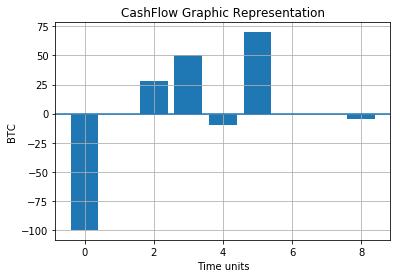

In [9]:
cash_flow.plot()

## Profitability

Profitability ratio is a measure that indicates the relation among the output flows and the input flows. An investor will prefer values > 1.


$$
profitability = \frac{\sum_i^n outflow_i }{\sum_j^m inflow_j }
$$

To get this value call the method *.get_profitability()*

In [11]:
print("The profitability ratio is of {}.".format(cash_flow.get_profitability()))

The profitability ratio is of 1.2869565217391303.


## Internal Return Rate

The IRR represent the rate at which the cash-flow structure adds value to the invested money. 

{note: add more theory}

In [10]:
print("The annual internal return rate is of {} %".format(cash_flow.get_irr()))

The annual internal return rate is of 8.395584 %
